# HomeWork:01
## Multivariate Parametric Classification
### Can Gözpınar 68965

In [692]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
from scipy.stats import multivariate_normal


## Parameters

In [693]:
np.random.seed(1)

#mean parameters of classes 1D array like
classesMeanMatrix = np.array([ [0.0, 2.5], 
[-2.5, -2.0], 
[2.5, -2.0] ])
#standard deviation of classes NxN array like
classesCovarianceMatrix =  np.array([ [[3.2, 0.0], [0.0, 1.2]],  
[[1.2, -0.8], [-0.8, 1.2]],  
[[1.2, 0.8], [0.8, 1.2]] ])
# Sample size N's for classes
classSizes = np.array([120, 90, 90])

## Data Generation

In [694]:
#generating samples randomly
points1 = np.random.multivariate_normal(classesMeanMatrix[0], classesCovarianceMatrix[0], classSizes[0])
points2 = np.random.multivariate_normal(classesMeanMatrix[1], classesCovarianceMatrix[1], classSizes[1])
points3 = np.random.multivariate_normal(classesMeanMatrix[2], classesCovarianceMatrix[2], classSizes[2])
points = np.concatenate((points1, points2, points3))
# generate corresponding labels
y = np.concatenate((np.repeat(1, classSizes[0]), np.repeat(2, classSizes[1]), np.repeat(3, classSizes[2])))

## Plot of Generated Random Data Points

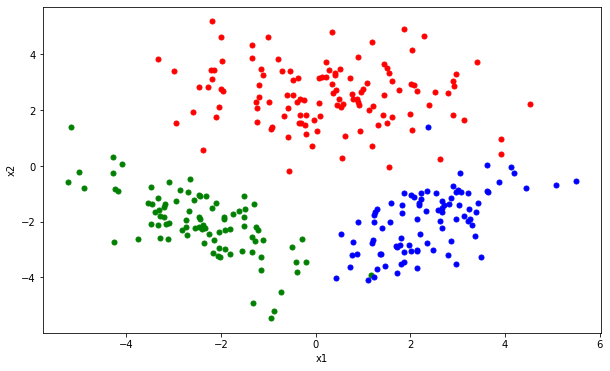

In [695]:
plt.figure(figsize = (10, 6))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10)
plt.plot(points3[:,0], points3[:,1],"b.", markersize = 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Estimate Parametes

In [696]:
# Sample means
# np.sum(,axis=0) is short form of doing this: np.array([np.sum(points1[:,0]) / len(points1), np.sum(points1[:,1]) / len(points1)])
sampleMean1Row = np.sum(points1,axis=0) / len(points1) # do .reshape(-1,1) to convert to column vector
sampleMean2Row = np.sum(points2,axis=0) / len(points2)
sampleMean3Row = np.sum(points3,axis=0) / len(points3)
#convert Sample means from row vectors to column vectors
sampleMean1Column = sampleMean1Row.reshape(-1,1)
sampleMean2Column = sampleMean2Row.reshape(-1,1)
sampleMean3Column = sampleMean3Row.reshape(-1,1)
#sample covariances
sampleCovariance1 = np.matmul(np.transpose(np.subtract(points1, sampleMean1Row)), np.subtract(points1, sampleMean1Row) ) / len(points1)
sampleCovariance2 = np.matmul(np.transpose(np.subtract(points2, sampleMean2Row)), np.subtract(points2, sampleMean2Row) ) / len(points2)
sampleCovariance3 = np.matmul(np.transpose(np.subtract(points3, sampleMean3Row)), np.subtract(points3, sampleMean3Row) ) / len(points3)
#prior probability
priorProbability1 = len(points1) / len(points) # samples in class C / samples in total
priorProbability2 = len(points2) / len(points)
priorProbability3 = len(points3) / len(points)


## Goal functions

In [697]:
#goal functions for classes 1,2,3
def goalFunction(point, sampleMeanRow, sampleCovariance, priorProbability):
    goalClassTerm1 = -0.5 * np.log(np.linalg.det(sampleCovariance))
    goalClassTerm2 = -0.5 * (np.matmul(np.subtract(point, sampleMeanRow), np.matmul(linalg.cho_solve(linalg.cho_factor(sampleCovariance), np.eye(2)), np.transpose(np.subtract(point, sampleMeanRow)) ) ))
    goalClassTerm3 = np.log(priorProbability)
    goalClass = goalClassTerm1 + goalClassTerm2 + goalClassTerm3
    return goalClass #returns goal function given parameters

##  Calculate the Confusion Matrix

In [698]:
#calculate the confusion matrix
confusionMatrix = np.zeros((3,3), dtype=int) #initialize the confusion matrix with 0 values
misclassifiedPoints = [] #array to hold on the point values of misclassified points
#count class 1
for point in points1:
    #calculate goal functions of classes given a point
    goalClass1 = goalFunction(point, sampleMean1Row, sampleCovariance1, priorProbability1)
    goalClass2 = goalFunction(point, sampleMean2Row, sampleCovariance2, priorProbability2)
    goalClass3 = goalFunction(point, sampleMean3Row, sampleCovariance3, priorProbability3)
    #find the max values goalClass
    if goalClass1 > goalClass2 and goalClass1 > goalClass3: #if predicted as class 1
        confusionMatrix[0][0] = confusionMatrix[0][0] + 1

    if goalClass2 > goalClass1 and goalClass2 > goalClass3: #if predicted as class 2
        confusionMatrix[1][0] = confusionMatrix[1][0] + 1
        misclassifiedPoints.append(point)
    
    if goalClass3 > goalClass1 and goalClass3 > goalClass2: #if predicted as class 3
        confusionMatrix[2][0] = confusionMatrix[2][0] + 1
        misclassifiedPoints.append(point)

#count class 2
for point in points2:
    #calculate goal functions of classes given a point
    goalClass1 = goalFunction(point, sampleMean1Row, sampleCovariance1, priorProbability1)
    goalClass2 = goalFunction(point, sampleMean2Row, sampleCovariance2, priorProbability2)
    goalClass3 = goalFunction(point, sampleMean3Row, sampleCovariance3, priorProbability3)
    #find the max values goalClass
    if goalClass1 > goalClass2 and goalClass1 > goalClass3: #if predicted as class 1
        confusionMatrix[0][1] = confusionMatrix[0][1] + 1
        misclassifiedPoints.append(point)

    if goalClass2 > goalClass1 and goalClass2 > goalClass3: #if predicted as class 2
        confusionMatrix[1][1] = confusionMatrix[1][1] + 1
    
    if goalClass3 > goalClass1 and goalClass3 > goalClass2: #if predicted as class 3
        confusionMatrix[2][1] = confusionMatrix[2][1] + 1
        misclassifiedPoints.append(point)

#count class 3
for point in points3:
    #calculate goal functions of classes given a point
    goalClass1 = goalFunction(point, sampleMean1Row, sampleCovariance1, priorProbability1)
    goalClass2 = goalFunction(point, sampleMean2Row, sampleCovariance2, priorProbability2)
    goalClass3 = goalFunction(point, sampleMean3Row, sampleCovariance3, priorProbability3)
    #find the max values goalClass
    if goalClass1 > goalClass2 and goalClass1 > goalClass3: #if predicted as class 1
        confusionMatrix[0][2] = confusionMatrix[0][2] + 1
        misclassifiedPoints.append(point)

    if goalClass2 > goalClass1 and goalClass2 > goalClass3: #if predicted as class 2
        confusionMatrix[1][2] = confusionMatrix[1][2] + 1
        misclassifiedPoints.append(point)
    
    if goalClass3 > goalClass1 and goalClass3 > goalClass2: #if predicted as class 3
        confusionMatrix[2][2] = confusionMatrix[2][2] + 1

misclassifiedPoints = np.array([[float(point[0]), float(point[1])] for point in misclassifiedPoints])#conversion for convenience
print("Confusion Matrix")
print("from top is truth")
print("from left is predicted")
print(confusionMatrix)


Confusion Matrix
from top is truth
from left is predicted
[[118   0   1]
 [  0  89   0]
 [  2   1  89]]


## Draw Decision Boundaries and Mark Misclassified Data on the Plot 

In [699]:
#calculate Wc, wc ,wco parameters
#for class 1
class1Wc = -0.5 * linalg.cho_solve(linalg.cho_factor(sampleCovariance1), np.eye(2))
class1wc = np.matmul(linalg.cho_solve(linalg.cho_factor(sampleCovariance1), np.eye(2)), sampleMean1Column)
class1wc0 = (-0.5 * np.matmul(np.matmul(np.transpose(sampleMean1Column), linalg.cho_solve(linalg.cho_factor(sampleCovariance1), np.eye(2))), sampleMean1Column)) - (-0.5 * np.log(np.linalg.det(sampleCovariance1))) + np.log(priorProbability1)
#for class 2
class2Wc = -0.5 * linalg.cho_solve(linalg.cho_factor(sampleCovariance2), np.eye(2))
class2wc = np.matmul(linalg.cho_solve(linalg.cho_factor(sampleCovariance2), np.eye(2)), sampleMean2Column)
class2wc0 = (-0.5 * np.matmul(np.matmul(np.transpose(sampleMean2Column), linalg.cho_solve(linalg.cho_factor(sampleCovariance2), np.eye(2))), sampleMean2Column)) - (-0.5 * np.log(np.linalg.det(sampleCovariance2))) + np.log(priorProbability2)
#for class 3
class3Wc = -0.5 * linalg.cho_solve(linalg.cho_factor(sampleCovariance3), np.eye(2))
class3wc = np.matmul(linalg.cho_solve(linalg.cho_factor(sampleCovariance3), np.eye(2)), sampleMean3Column)
class3wc0 = (-0.5 * np.matmul(np.matmul(np.transpose(sampleMean3Column), linalg.cho_solve(linalg.cho_factor(sampleCovariance3), np.eye(2))), sampleMean3Column)) - (-0.5 * np.log(np.linalg.det(sampleCovariance3))) + np.log(priorProbability3)

#example goalClass1 = np.matmul(np.matmul(np.transpose(points1[0]), class1Wc), points1[0]) + np.matmul(np.transpose(class1wc), points1[0]) + class1wc0


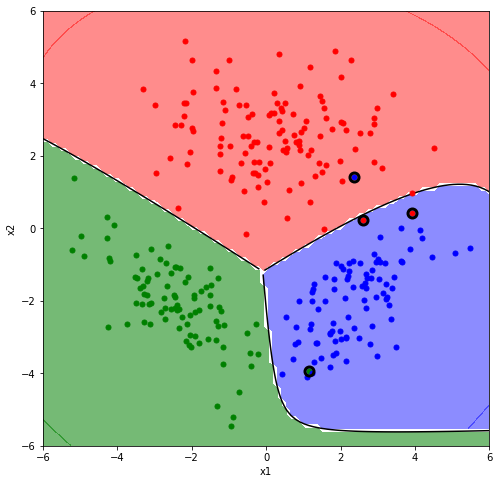

In [700]:
#mplot data points
plt.figure(figsize = (8, 8))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10)
plt.plot(points3[:,0], points3[:,1],"b.", markersize = 10)
plt.xlabel("x1")
plt.ylabel("x2")


#mark misclassified data
plt.plot(misclassifiedPoints[:,0],misclassifiedPoints[:,1], "ok", fillstyle="none", markersize=9, markeredgewidth=3.0)

#draw Decision Boundaries namely, g1==g2 or g1==g3 or g2==g3
axis = np.linspace(-6,6,100)
xx, yy = np.meshgrid(axis, axis)

discriminantValuesClass1 = np.zeros((len(axis),len(axis)))
discriminantValuesClass2 = np.zeros((len(axis),len(axis)))
discriminantValuesClass3 = np.zeros((len(axis),len(axis)))

#handle separating lines
for a in range(len(axis)):
    for b in range(len(axis)):
        x1 = xx[a,b]
        x2 = yy[a,b]
        discriminantValuesClass1[a,b] = goalFunction(np.array([x1, x2]), sampleMean1Row, sampleCovariance1, priorProbability1)
        discriminantValuesClass2[a,b] = goalFunction(np.array([x1, x2]), sampleMean2Row, sampleCovariance2, priorProbability2)
        discriminantValuesClass3[a,b] = goalFunction(np.array([x1, x2]), sampleMean3Row, sampleCovariance3, priorProbability3)

A = discriminantValuesClass1
B = discriminantValuesClass2
C = discriminantValuesClass3
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan

plt.contour(xx, yy, A - B, levels = 0, colors = "k")
plt.contour(xx, yy, A - C, levels = 0, colors = "k")
plt.contour(xx, yy, B - C, levels = 0, colors = "k")

#handle contour 
A = discriminantValuesClass1
B = discriminantValuesClass2
C = discriminantValuesClass3
A[(A < B) | (A < C)] = np.nan
B[(B < A) | (B < C)] = np.nan
C[(C < A) | (C < B)] = np.nan

plt.contourf(xx, yy, A , levels = 0, colors = "r", alpha=0.45)
plt.contourf(xx, yy, B , levels = 0, colors = "g", alpha=0.54)
plt.contourf(xx, yy, C , levels = 0, colors = "b", alpha=0.45)

plt.show()